<a href="https://colab.research.google.com/github/Almuzhidul/PSDS_Kelas_Mahir/blob/main/Weather_AUS_Almuzhidul_Mujhid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assalamualaikum Warahmatullaahi Wabarakaatuh**
Beriku proses Klasifikasi yang saya lakukan pada data Weather AUS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from numpy.random import randint
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Almuzhidul/PSDS_Kelas_Mahir/main/weatherAUS.csv%20-%20weatherAUS.csv.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


# **Exploratory Data Analysis**

### *Mengecek Dimensi Data*

In [ ]:
df.shape

(145460, 23)

### *Mengecek Variabel Dataset*

In [ ]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

Terdapat 23 Kolom/Variabel

### *Melihat Tipe Data pada Variabel*

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm       object
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  object 
 17  Cloud9am       89572 non-null

### *Melihat Statistik Data*

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,9.000000,9.000000,40.200000,46.70000


### *Mengecek Missing Data*

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

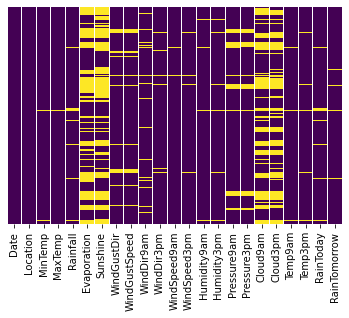

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### *Menghapus Kolom*
disini saya menghapus kolom ```Date``` karena dirasa tidak diperlukan

In [ ]:
df.drop('Date',inplace=True,axis=1)
df.drop('Pressure9am',inplace=True,axis=1)
df.drop('Pressure3pm',inplace=True,axis=1)

### *Mengisi NAN*
Dengan menggunakan fillna : ```ffill``` yaitu kita menggunakan nilai pada kolom sebelumnya sebagai nilai kolom setelahnya, ```bfill``` yaitu kita menggunakan nilai setelahnya sebagai nilai kolomm sebelumnya

In [ ]:
#df.fillna(df.mean(),axis='columns')
df=df.fillna(method='bfill')
df=df.fillna(method='ffill')
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,8.0,2.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,7.0,2.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,7.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,7.0,8.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,3.0,2.0,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,3.0,2.0,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,3.0,2.0,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,10.0,10.7,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

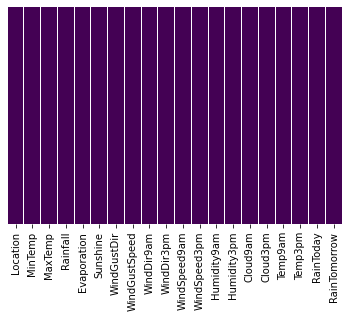

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

dapat dilihhat bahwa sudah tidak ada data yang hilang

## *Mengecek Outlier*

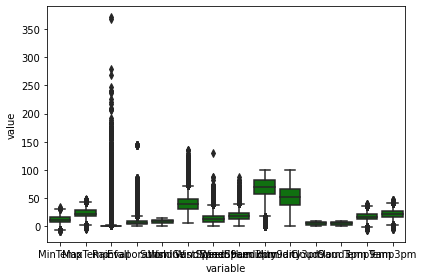

In [ ]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Terlihat kolom dengan jenis numerik yang masih outlier ada 10 variabel

## *Melakukan Pengkodean data String*

In [ ]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Brisbane            3193
Adelaide            3193
Hobart              3193
Perth               3193
Melbourne           3193
Darwin              3193
Albury              3040
AliceSprings        3040
Ballarat            3040
Albany              3040
MountGambier        3040
Wollongong          3040
Cairns              3040
Bendigo             3040
MountGinini         3040
Launceston          3040
Townsville          3040
GoldCoast           3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
Dartmoor            3009
Nuriootpa           3009
Cobar               3009
NorfolkIsland       3009
Witchcliffe         3009
Williamtown         3009
BadgerysCreek       3009
Portland            3009
PearceRAAF          3009
Woomera             3009
Watsonia            3009
Sale                3009
CoffsHarbour        3009
Moree               3009
PerthAirport        3009
Richmond            3009
Mildura             3009


In [ ]:
df["Location"] = df["Location"].astype('category')

In [ ]:
df['WindGustDir'].value_counts()

SSE    13367
SSW    11952
W      10112
SE      9603
SW      9486
N       9422
E       9391
S       9302
WSW     9231
WNW     8455
NW      8417
ENE     8260
ESE     7741
NE      7261
NNE     6741
NNW     6719
Name: WindGustDir, dtype: int64

In [ ]:
df["WindGustDir"] = df["WindGustDir"].astype('category')

In [ ]:
df['WindDir9am'].value_counts()

N      12782
SE     10022
NW      9854
SSE     9824
E       9720
S       9263
SW      9105
W       8865
NNE     8826
NNW     8633
NE      8550
ENE     8422
SSW     8066
ESE     8020
WNW     7860
WSW     7648
Name: WindDir9am, dtype: int64

In [ ]:
df["WindDir9am"] = df["WindDir9am"].astype('category')

In [ ]:
df['WindDir3pm'].value_counts()

SE     11186
S      10344
W      10327
SSE    10167
WSW     9616
SW      9463
NE      9115
N       9039
WNW     9027
NW      8916
ESE     8793
E       8582
SSW     8301
NNW     7977
ENE     7940
NNE     6667
Name: WindDir3pm, dtype: int64

In [ ]:
df["WindDir3pm"] = df["WindDir3pm"].astype('category')

In [ ]:
df['RainToday'].value_counts()

No     111713
Yes     33747
Name: RainToday, dtype: int64

In [ ]:
df["RainToday"] = df["RainToday"].astype('category')

In [ ]:
df['RainTomorrow'].value_counts()

No     111716
Yes     33744
Name: RainTomorrow, dtype: int64

In [ ]:
df["RainTomorrow"] = df["RainTomorrow"].astype('category')

In [ ]:
#Proses Pengkodean
df["Location"] = df["Location"].cat.codes
df["WindGustDir"] = df["WindGustDir"].cat.codes
df["WindDir9am"] = df["WindDir9am"].cat.codes
df["WindDir3pm"] = df["WindDir3pm"].cat.codes
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,20.0,24.0,71.0,22.0,8.0,2.0,16.9,21.8,No,No
1,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,4.0,22.0,44.0,25.0,7.0,2.0,17.2,24.3,No,No
2,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,19.0,26.0,38.0,30.0,7.0,2.0,21.0,23.2,No,No
3,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,11.0,9.0,45.0,16.0,7.0,8.0,18.1,26.5,No,No
4,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,7.0,20.0,82.0,33.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
cleanup_nums = {"RainToday":     {"Yes": 1, "No": 0},
                "RainTomorrow": {"Yes": 1, "No": 0}}
df = df.replace(cleanup_nums)

In [ ]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Location         25.0
MinTemp           9.2
MaxTemp          10.3
Rainfall          0.8
Evaporation       5.8
Sunshine          5.5
WindGustDir       8.0
WindGustSpeed    17.0
WindDir9am        8.0
WindDir3pm        8.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Cloud9am          5.0
Cloud3pm          5.0
Temp9am           9.2
Temp3pm           9.9
RainToday         0.0
RainTomorrow      0.0
dtype: float64


In [ ]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,20.0,24.0,71.0,22.0,8.0,2.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,4.0,22.0,44.0,25.0,7.0,2.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,19.0,26.0,38.0,30.0,7.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,11.0,9.0,45.0,16.0,7.0,8.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,7.0,20.0,82.0,33.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,10.0,10.7,0,31.0,9,1,13.0,11.0,51.0,24.0,3.0,2.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,10.0,10.7,6,22.0,9,3,13.0,9.0,56.0,21.0,3.0,2.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,10.0,10.7,3,37.0,9,14,9.0,9.0,53.0,24.0,3.0,2.0,12.5,26.1,0,0
145458,41,7.8,27.0,0.0,10.0,10.7,9,28.0,10,3,13.0,7.0,51.0,24.0,3.0,2.0,15.1,26.0,0,0


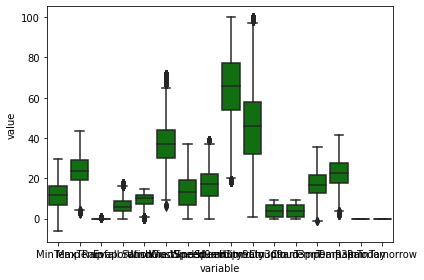

In [ ]:
#Setelah memperkecil outlier
df1=df_clear.select_dtypes(include=['float64', 'int64','category'])

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

## *Normalisasi Data*

In [ ]:
df_clear.dtypes

Location            int8
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [ ]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.545961,0.496350,0.6,0.674157,0.848276,0.866667,0.575758,0.866667,0.933333,0.540541,0.615385,0.646341,0.212121,0.888889,0.222222,0.498638,0.506329,0.0,0.0
1,0.041667,0.378830,0.549878,0.0,0.674157,0.848276,0.933333,0.575758,0.400000,1.000000,0.108108,0.564103,0.317073,0.242424,0.777778,0.222222,0.506812,0.569620,0.0,0.0
2,0.041667,0.532033,0.564477,0.0,0.674157,0.848276,1.000000,0.606061,0.866667,1.000000,0.513514,0.666667,0.243902,0.292929,0.777778,0.222222,0.610354,0.541772,0.0,0.0
3,0.041667,0.428969,0.620438,0.0,0.674157,0.848276,0.266667,0.272727,0.600000,0.000000,0.297297,0.230769,0.329268,0.151515,0.777778,0.888889,0.531335,0.625316,0.0,0.0
4,0.041667,0.660167,0.725061,1.0,0.674157,0.848276,0.866667,0.530303,0.066667,0.466667,0.189189,0.512821,0.780488,0.323232,0.777778,0.888889,0.523161,0.706329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86898,0.854167,0.250696,0.508516,0.0,0.561798,0.737931,0.000000,0.378788,0.600000,0.066667,0.351351,0.282051,0.402439,0.232323,0.333333,0.222222,0.313351,0.521519,0.0,0.0
86899,0.854167,0.272981,0.554745,0.0,0.561798,0.737931,0.400000,0.242424,0.600000,0.200000,0.351351,0.230769,0.463415,0.202020,0.333333,0.222222,0.335150,0.574684,0.0,0.0
86900,0.854167,0.323120,0.593674,0.0,0.561798,0.737931,0.200000,0.469697,0.600000,0.933333,0.243243,0.230769,0.426829,0.232323,0.333333,0.222222,0.378747,0.615190,0.0,0.0
86901,0.854167,0.389972,0.596107,0.0,0.561798,0.737931,0.600000,0.333333,0.666667,0.200000,0.351351,0.179487,0.402439,0.232323,0.333333,0.222222,0.449591,0.612658,0.0,0.0


In [ ]:
y=df_norm['RainTomorrow']
X=df_norm.drop(columns=['RainTomorrow'])
#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0. 0. 0. ... 0. 0. 0.]
[[0.04166667 0.545961   0.49635036 ... 0.4986376  0.50632911 0.        ]
 [0.04166667 0.37883008 0.54987835 ... 0.50681199 0.56962025 0.        ]
 [0.04166667 0.53203343 0.56447689 ... 0.61035422 0.54177215 0.        ]
 ...
 [0.85416667 0.32311978 0.59367397 ... 0.37874659 0.61518987 0.        ]
 [0.85416667 0.38997214 0.59610706 ... 0.44959128 0.61265823 0.        ]
 [0.85416667 0.58774373 0.59610706 ... 0.44686649 0.4835443  0.        ]]


# **Pemodelan KNN**

### Ide Dasar
Mengklasifikasikan sebuah data ke dalam sebuah kelas didasarkan pada tetangga terdekatnya

### Algoritma KNN
Klasifikasi dengan algoritma KNN dilakukan dengan langkah-langkah berikut:
1. Menghitung jarak antara data uji dan masing-masing data latih
2. Mengurutkan jarak dari terdekat hingga terjauh
3. Mengambil sejumlah k teratas dari vektor jarak(Tetangga)
4. Mengambil kelas yang paling sering muncul pada baris yang dipilih
5. Memilih kelas dari data prediksi

### Kelebihan
Fase pelatihan klasifikasi tetangga terdekat K jauh lebih cepat dibandingkan dengan algoritma klasifikasi lainnya. Tidak perlu melatih model untuk generalisasi, itulah sebabnya KNN dikenal sebagai algoritma pembelajaran sederhana dan berbasis instans. KNN dapat berguna dalam kasus data nonlinier. Ini bisa digunakan dengan masalah regresi. Nilai output untuk objek dihitung dengan rata-rata nilai k tetangga terdekat.

### Kekurangan
Fase pengujian klasifikasi K-terdekat tetangga lebih lambat dan lebih mahal dalam hal waktu dan memori. Ini membutuhkan memori yang besar untuk menyimpan seluruh set data pelatihan untuk prediksi. KNN memerlukan penskalaan data karena KNN menggunakan jarak Euclidean antara dua titik data untuk menemukan tetangga terdekat. Jarak euclidean sensitif terhadap magnitudo. Fitur dengan magnitudo tinggi akan lebih berbobot daripada fitur dengan magnitudo rendah. KNN juga tidak cocok untuk data berdimensi besar.

### Meningkatkan KNN
Untuk hasil yang lebih baik, sangat disarankan untuk menormalkan data pada skala yang sama. Umumnya, rentang normalisasi dianggap antara 0 dan 1. KNN tidak cocok untuk data berdimensi besar. Dalam kasus seperti itu, dimensi perlu dikurangi untuk meningkatkan kinerja. Selain itu, menangani nilai yang hilang akan membantu kami meningkatkan hasil.

In [ ]:
y = df.RainTomorrow.values
x_data = df.drop(['RainTomorrow'], axis = 1)

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(9, knn.score(x_test.T, y_test.T)*100))

9 NN Score: 82.87%


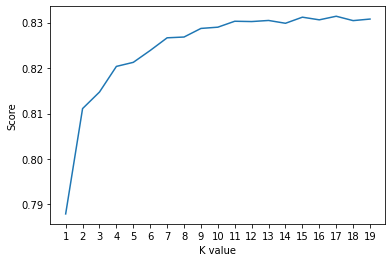

Maximum KNN Score is 83.14%


In [ ]:
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

dapat dilihat bahwa untuk k 17 adalah yang mempunyai akurasi terbaik yaitu 83,14%

## *Confusion Matrix*

In [363]:
confusion_matrix(y_test,prediction)

array([[21008,  1350],
       [ 3633,  3101]])

Didapatkan dari confusion matrix untuk metode KNN :\
True Positif : 21008\
True Negatif : 3101\
False Positif : 3633\
False Negatif : 1350